<a href="https://colab.research.google.com/github/vavana619/quant_machine/blob/main/%5B6%EC%9E%A5%5D_%EC%9A%B0%EB%9F%89%EC%A3%BC%EB%A5%BC_%EC%B0%BE%EB%8A%94_%EA%B8%B0%EC%88%A0_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4. 안정성 지표

* 망하지 않을 기업을 찾는 가장 직접적인 방법 : *부채(빌린 돈)가 얼마인지* 살펴보는 것
  * 절대 금액의 크고 작고의 문제가 아니라 *구성*을 봐야함
  * 전체 자산 중 부채가 얼마나 많은지를 따지는 부채비율, 부채 중에서도 **차입금비율**을 봐야함

### [부채비율]
: 전체 자산에서 부채가 더 많은지, 자본이 더 많은지를 나타냄 (부채비율이 100 이상이라면 부채가 자본보다 많은 것)

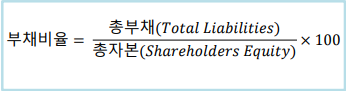

- 부채비율이 높다고 꼭 나쁜 것만은 아님 (해당 산업의 특성을 함께 고려해야 함)


### [차입금]
: *이자 비용*을 발생시켜 기업의 손익에 직접적인 영향을 미침

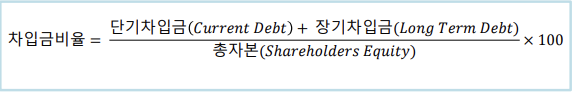

* 단기차입금과 장기차입금이 있음
  -> **단기차입금** : 1년 이내에 갚아야 할 돈
* **부채비율과 총자산이 줄어들면 회사가 망해하는 것**일수도 있다는 의미
* 부채비율을 줄어드는데 총자산은 유지 또는 증가하면 돈을 잘 벌고, 빛도 잘 갚으면서 회사는 성장하고 있다는 신도

In [1]:
pip install finterstellar

     |████████████████████████████████| 109 kB 7.8 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [2]:
import finterstellar as fs
OTP = '16500881341189711897'

In [3]:
df = fs.fn_single(otp=OTP, symbol='UBER', window='T') # 우버(UBER) 재무제표 데이터 불러오기

## 1) 지표산출
* **부채비율** = 총부채/총자본
* **차입금비율** = (장기차입금+단기차입금)/총자본

In [4]:
df['Liability/Equity'] = df['Total Liabilities'] / df['Shareholders Equity'] # 부채
df['Debt/Equity'] = (df['Long Term Debt'] + df['Current Debt']) / df['Shareholders Equity'] # 차액금

In [5]:
df[['Liability/Equity', 'Debt/Equity']].tail()

,Liability/Equity,Debt/Equity
2020-12-31,1.589597,0.845752
2021-03-31,1.513752,0.718047
2021-06-30,1.446702,0.688183
2021-09-30,1.622209,0.804321
2021-12-31,1.620210,0.802601


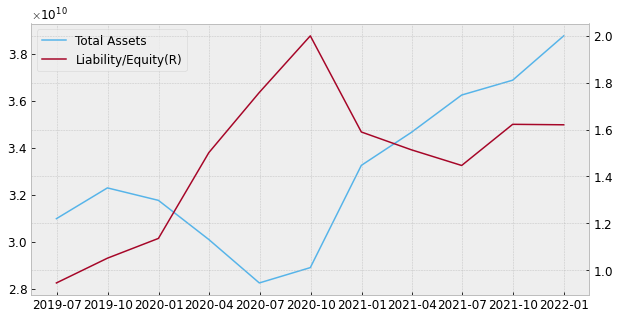

In [6]:
fs.draw_chart(df, left='Total Assets', right='Liability/Equity') # 부채비율과 자산을 함께 비교

-> *부채비율은 늘어나고 자산은 줄어드는 형태*로 가장 경계해야할 모양의 그래프

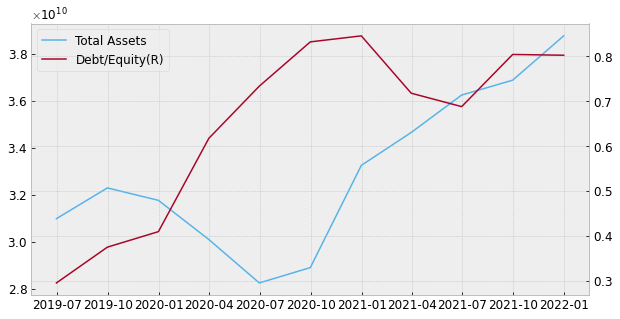

In [7]:
fs.draw_chart(df, left='Total Assets', right='Debt/Equity') # 부채비율과 차입금 비율을 함께 비교

-> 부채비율과 별만 다르지 않음, 이후에 줄어들긴함

## 2) 백테스트




### [부채비율이 낮은 종목에 투자하는 전략을 테스트]

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK
CAGR: 5.76%
Accumulated return: 75.09%
Investment period: 10.0yrs
Sharpe ratio: 0.32
MDD: -29.50%


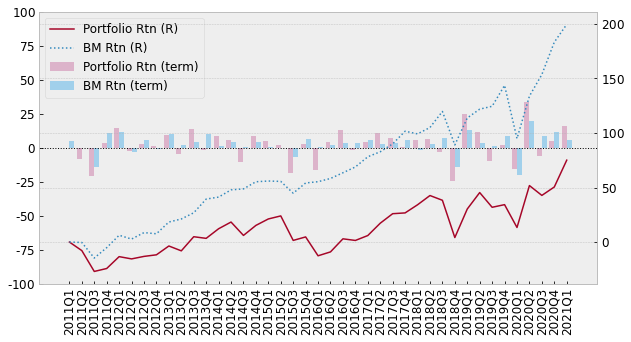

In [8]:
# Liability/Equity 코드 모아보기
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1') # 2011년 1분기 ~ 2021년 1분기
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp=OTP, term=t)

s = {}
signal = {}

for t in terms:
  data[t]['Liability/Equity'] = data[t]['Total Liabilities'] / data[t]['Shareholders Equity']
  data[t].loc[(data[t]['Shareholders Equity'] < 0), 'Liability/Equity'] = float('nan')
  
  s[t] = fs.fn_filter(data[t], by='Liability/Equity', floor=0, n=30, asc=True)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

-> 테스트 결과는 그다지 감동적이지 못함

### [**PER과 부채비율을 합성**한 전략 테스트]
: PER가 낮으면서 부채비율이 낮은 1,000개에 속하는 종목을 합성한 전략을 테스트

* PER과 저부채비율 종목에 *교집합(how=and)* 종목을 뽑고 분기별로 30개 종목만 추려내도록 함
* 결과를 보면 단독 테스트보다 합성 전략의 성과가 더 나쁨
* 부채비율이 낮으면 안정성이 높지만 투자에는 도움이 안 된 것 같음


In [16]:
# PER + Liability/Equity 코드 모아보기
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#   data[t] = fs.fn_consolidated(otp=OTP, term=t)

s = {}
s1 = {}
s2 = {}
signal = {}

for t in terms:
  # PER
  data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS']

  # Liability/Equity
  data[t]['Liability/Equity'] = data[t]['Total Liabilities'] / data[t]['Shareholders Equity']
  data[t].loc[(data[t]['Shareholders Equity'] < 0), 'Liability/Equity'] = float('nan')

  s1[t] = fs.fn_filter(data[t], by='PER', floor=1, cap=10, asc=True)
  s2[t] = fs.fn_filter(data[t], by='Liability/Equity', floor=0, n=1000, asc=True)
  s[t] = fs.combine_signal(s1[t], s2[t], how='and', n=30)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 1.17%
Accumulated return: 12.40%
Investment period: 10.0yrs
Sharpe ratio: 0.04
MDD: -57.91%


### [**PBR과 부채비율을 합성**한 전략 테스트]
: PBR가 낮으면서 부채비율이 낮은 1,000개에 속하는 종목을 합성한 전략을 테스트

In [17]:
# PBR + Liability/Equity 코드 모아보기
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#   data[t] = fs.fn_consolidated(otp=OTP, term=t)

s = {}
s1 = {}
s2 = {}
signal = {}

for t in terms:
  # PBR
  data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity'] / data[t]['Shares'])

  # Liability/Equity
  data[t]['Liability/Equity'] = data[t]['Total Liabilities'] / data[t]['Shareholders Equity']
  data[t].loc[(data[t]['Shareholders Equity'] < 0), 'Liability/Equity'] = float('nan')

  s1[t] = fs.fn_filter(data[t], by='PBR', floor=.1, cap=1, asc=True)
  s2[t] = fs.fn_filter(data[t], by='Liability/Equity', floor=0, n=1000, asc=True)
  s[t] = fs.combine_signal(s1[t], s2[t], how='and', n=30)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 25.23%
Accumulated return: 850.09%
Investment period: 10.0yrs
Sharpe ratio: 1.63
MDD: -49.00%


-> PER로 했을 때보다 훨씬 나아짐 (근데 단독으로 PER, PBR 사용해도 이 정도 차이는 나옴)

# 5. 성장률 지표

## [대표적인 성장률 지표]
* 매출액 성장률(Revenue Growth)
* 순이익 성장률(Price Earning Growth)
* 자산 증가율(Asset Growth)
* 영업이익 증가율(Operating Income Growth)
* 당기순이익 증가율(Net Income Growth)

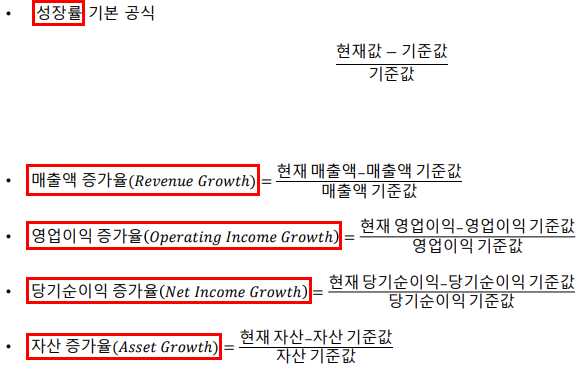

In [18]:
df = fs.fn_single(otp=OTP, symbol='NFLX', window='T') # 넷플릭스(NFLX) 재무제표 데이터 불러오기

## 1) 지표산출

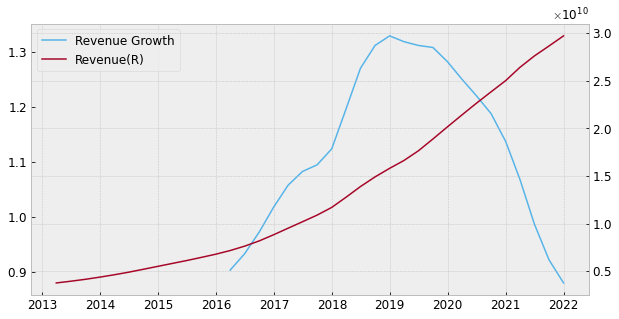

In [19]:
# 매출액 증가율 (여기서는 3년간 매출액 증가율을 따져봄) -> 12분기
df['Revenue Growth'] = (df['Revenue'] - df['Revenue'].shift(12)) / abs(df['Revenue'].shift(12))
fs.draw_chart(df, left='Revenue Growth', right='Revenue')

-> 매출액은 계속 증가하고 있지만 그 속도가 조금 줄어들었음 (증가율 데이터는 3년 전 데이터가 있어야 산출이 가능하기 때문에 빨간색보다 3년 후부터 시작함)

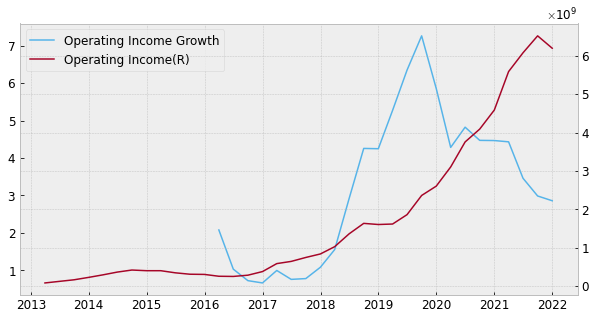

In [20]:
# 영업이익 증가율 (여기서는 3년간 영업이익 증가율을 따져봄) -> 12분기
df['Operating Income Growth'] = (df['Operating Income'] - df['Operating Income'].shift(12)) / abs(df['Operating Income'].shift(12))
fs.draw_chart(df, left='Operating Income Growth', right='Operating Income')

-> 영업이익이 꾸준히 증가했으며 코로나19로 인해 넷플릭스가 폭발적으로 성장함

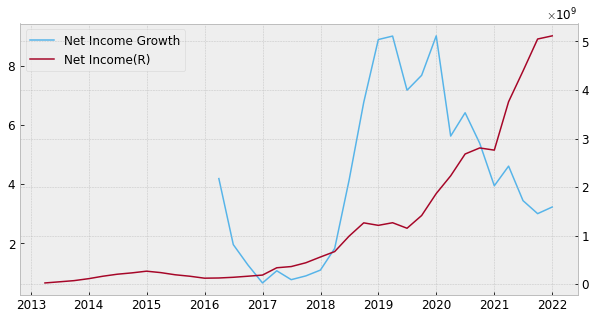

In [21]:
# 순이익 증가율
df['Net Income Growth'] = (df['Net Income'] - df['Net Income'].shift(12)) / abs(df['Net Income'].shift(12))
fs.draw_chart(df, left='Net Income Growth', right='Net Income')

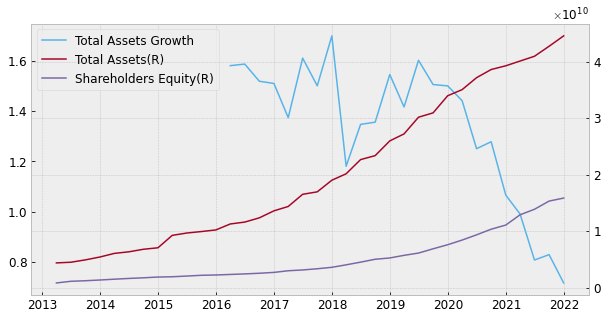

In [22]:
# 자산 증가율
df['Total Assets Growth'] = (df['Total Assets'] - df['Total Assets'].shift(12)) / abs(df['Total Assets'].shift(12))
fs.draw_chart(df, left='Total Assets Growth', right=['Total Assets', 'Shareholders Equity'])

* 빨간색 : 총자산, 파란색 : 자산증가율, 보라색 : 총자본
* **자산은 꾸준히 증가하지만 증가율은 점점 줄어들고 있음**
* 자산은 자본+부채로 이루어지는데 **자본은 자산에 비해 훨씬 아래에 있음** -> *부채를 많이 끌어와 투자*를 했다는 의미 (레버리지를 많이 활용하고 있음)

## 2) 백테스트



### [매출액증가율(3년) 상위 30개 종목에 투자하는 경우를 테스트]

CAGR: 19.25%
Accumulated return: 243.25%
Investment period: 7.0yrs
Sharpe ratio: 0.98
MDD: -29.95%


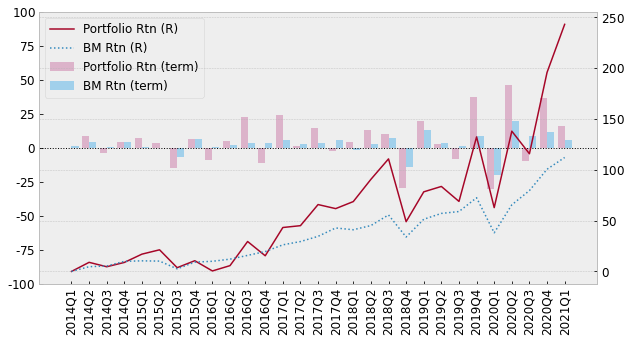

In [25]:
# 매출액 증가율
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1') # 2011년 1분기 ~ 2021년 1분기
# data = {}
# for t in terms:
#   data[t] = fs.fn_consolidated(otp=OTP, term=t)

s = {}
signal = {}
y = 3 # 3년 전 데이터와 비교하기 위해 지정

for t in terms:
  if list(terms).index(t) >= y*4: # 현재 데이터 t가 y*4보다 큰 지 비교
    prev_t = fs.quarters_before(terms, t, y*4) # 3년 * 4분기 = 12분기 (12개 전 분기값을 가져와 저장)
    data[t]['Revenue Growth'] = (data[t]['Revenue'] - data[prev_t]['Revenue']) / abs(data[prev_t]['Revenue'])
  
    s[t] = fs.fn_filter(data[t], by='Revenue Growth', floor=0, n=30, asc=False)
    signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df) # 성과는 그냥 그럼

### [영업이익 증가율(3년) 상위 30개 종목에 투자하는 경우를 테스트]

CAGR: 7.35%
Accumulated return: 64.32%
Investment period: 7.0yrs
Sharpe ratio: 0.33
MDD: -47.24%


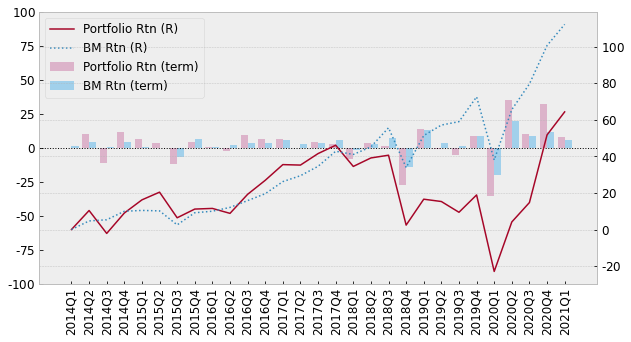

In [26]:
# 영업이익 증가율
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1') # 2011년 1분기 ~ 2021년 1분기
# data = {}
# for t in terms:
#   data[t] = fs.fn_consolidated(otp=OTP, term=t)

s = {}
signal = {}
y = 3 # 3년 전 데이터와 비교하기 위해 지정

for t in terms:
  if list(terms).index(t) >= y*4: # 현재 데이터 t가 y*4보다 큰 지 비교
    prev_t = fs.quarters_before(terms, t, y*4) # 3년 * 4분기 = 12분기 (12개 전 분기값을 가져와 저장)
    data[t]['Operating Income Growth'] = (data[t]['Operating Income'] - data[prev_t]['Operating Income']) / abs(data[prev_t]['Operating Income'])
  
    s[t] = fs.fn_filter(data[t], by='Operating Income Growth', floor=0, n=30, asc=False)
    signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

### [순이익 증가율(3년) 상위 30개 종목에 투자하는 경우를 테스트]

CAGR: 4.10%
Accumulated return: 32.53%
Investment period: 7.0yrs
Sharpe ratio: 0.21
MDD: -32.94%


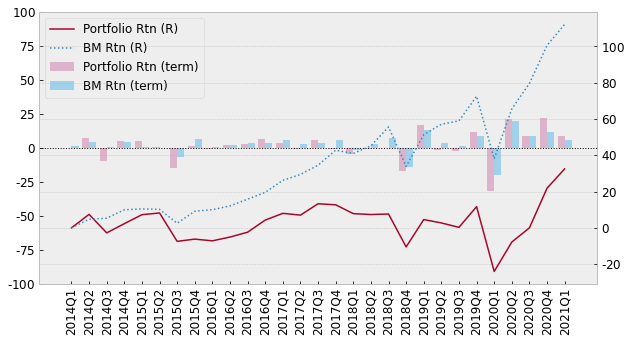

In [27]:
# 순이익 증가율
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1') # 2011년 1분기 ~ 2021년 1분기
# data = {}
# for t in terms:
#   data[t] = fs.fn_consolidated(otp=OTP, term=t)

s = {}
signal = {}
y = 3 # 3년 전 데이터와 비교하기 위해 지정

for t in terms:
  if list(terms).index(t) >= y*4: # 현재 데이터 t가 y*4보다 큰 지 비교
    prev_t = fs.quarters_before(terms, t, y*4) # 3년 * 4분기 = 12분기 (12개 전 분기값을 가져와 저장)
    data[t]['Net Income Growth'] = (data[t]['Net Income'] - data[prev_t]['Net Income']) / abs(data[prev_t]['Net Income'])
  
    s[t] = fs.fn_filter(data[t], by='Net Income Growth', floor=0, n=30, asc=False)
    signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df) # 그다지 쓸만한 지표는 아님

결론) 성장률 지표 자체는 별 효과가 없었음 -> 다른 지표와 섞어보면 어떨까?

### [주가 수익비율(PER) + 순이익 증가율(Net Income Growth)]

CAGR: 4.07%
Accumulated return: 32.24%
Investment period: 7.0yrs
Sharpe ratio: 0.14
MDD: -56.39%


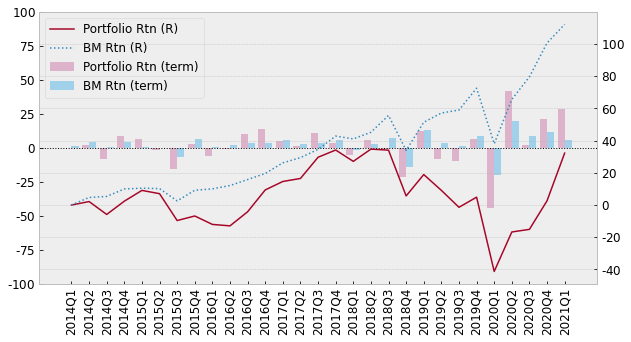

In [28]:
# PER + 순이익 증가율
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1') # 2011년 1분기 ~ 2021년 1분기
# data = {}
# for t in terms:
#   data[t] = fs.fn_consolidated(otp=OTP, term=t)

s1 = {}
s2 = {}
s = {}
signal = {}
y = 3 # 3년

for t in terms:
  if list(terms).index(t) >= y*4: # 현재 데이터 t가 y*4보다 큰 지 비교
    prev_t = fs.quarters_before(terms, t, y*4) # 3년 * 4분기 = 12분기 (12개 전 분기값을 가져와 저장)
    data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS']
    data[t]['Net Income Growth'] = (data[t]['Net Income'] - data[prev_t]['Net Income']) / abs(data[prev_t]['Net Income'])
  
    s1[t] = fs.fn_score(data[t], by='PER', floor=1, cap=10, asc=True)
    s2[t] = fs.fn_score(data[t], by='Net Income Growth', floor=0, asc=False)
    s[t] = fs.combine_score(s1[t], s2[t], n=30)
    signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df) # 결과 별로

### [주가순자산비율(PBR) + 영업이익 증가율(Operating Income Growth)]

CAGR: 9.53%
Accumulated return: 89.17%
Investment period: 7.0yrs
Sharpe ratio: 0.33
MDD: -54.25%


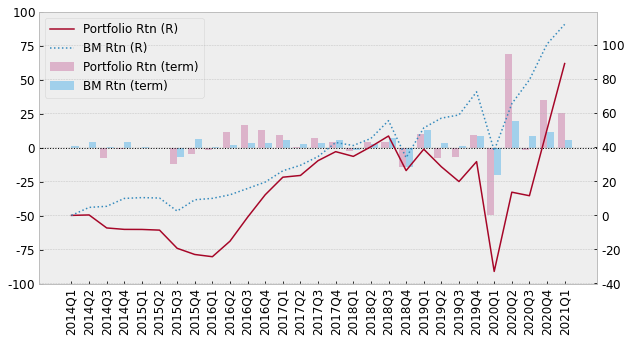

In [29]:
# PBR + 영업이익 증가율
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1') # 2011년 1분기 ~ 2021년 1분기
# data = {}
# for t in terms:
#   data[t] = fs.fn_consolidated(otp=OTP, term=t)

s1 = {}
s2 = {}
s = {}
signal = {}
y = 3 # 3년

for t in terms:
  if list(terms).index(t) >= y*4: # 현재 데이터 t가 y*4보다 큰 지 비교
    prev_t = fs.quarters_before(terms, t, y*4) # 3년 * 4분기 = 12분기 (12개 전 분기값을 가져와 저장)
    data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity'] / data[t]['Shares'])
    data[t]['Operating Income Growth'] = (data[t]['Operating Income'] - data[prev_t]['Operating Income']) / abs(data[prev_t]['Operating Income'])
  
    s1[t] = fs.fn_score(data[t], by='PBR', floor=.1, cap=1, asc=True)
    s2[t] = fs.fn_score(data[t], by='Operating Income Growth', floor=0, asc=False)
    s[t] = fs.combine_score(s1[t], s2[t], n=30)
    signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df) # 결과 별로

# 6. 회전율 지표

* 회전율 : *동일한 자원을 가지고 얼마나 부지런히 사업을 돌려* 매출을 일으키는지를 판단하는 지표

1) 총자산 회전율 : 자산대비 매출 측정
-> 총자산 회전율이 낮으면 기업이 비효율적으로 운영되는 것
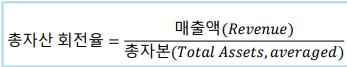

2) 매출채권 회전율 : 매출채권대비 매출 측정 -> 외상으로 물건을 파는 일이 줄었다는 뜻, 제품의 경쟁력이  높아지거나 거래처의 질이 높아진 것
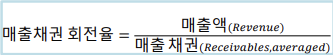

3) 재고자산 회전율 : 재고대비 매출원가 측정
  * 높으면 물건을 만들면 바로 팔린다는 뜻
  * 너무 높은 경우, 공급이 수요를 못 따라가는 것으로 볼 수 있음

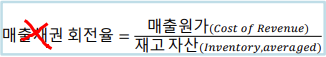

In [30]:
df = fs.fn_single(otp=OTP, symbol='F', window='T') # 포드(F) 재무제표 데이터 불러오기

## 1) 지표산출

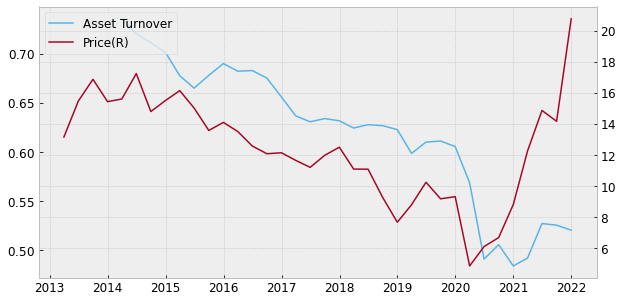

In [31]:
# 총자산 회전율
df['Avg Assets'] = (df['Total Assets'] + df['Total Assets'].shift(4)) / 2 # 총자산의 평균
df['Asset Turnover'] = df['Revenue'] / df['Avg Assets'] # 총자산회전율
fs.draw_chart(df, left='Asset Turnover', right='Price')

-> 총자산회전율과 주가가 조금은 연관이 있어 보임

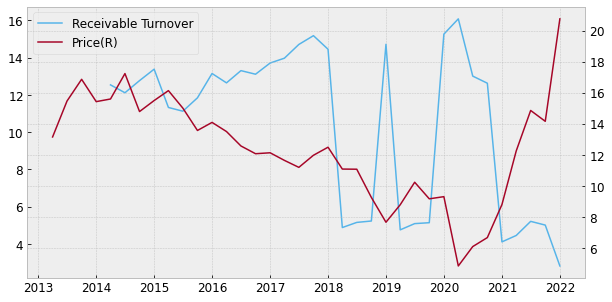

In [32]:
# 매출채권 회전율
df['Avg Receivables'] = (df['Receivables'] + df['Receivables'].shift(4)) / 2 # 매출채권의 평균
df['Receivable Turnover'] = df['Revenue'] / df['Avg Receivables']
fs.draw_chart(df, left='Receivable Turnover', right='Price')

-> 매출채권회전률은 주가와 관련있어 보이지 않음

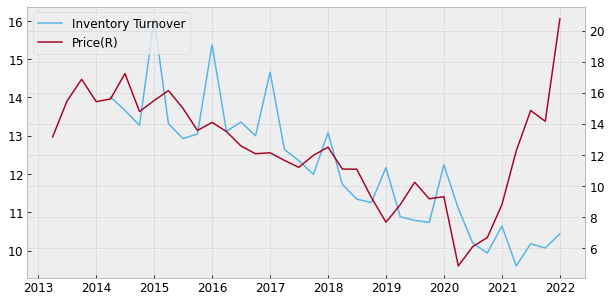

In [33]:
# 재고자산 회전률
df['Avg Inventory'] = (df['Inventory'] + df['Inventory'].shift(4)) / 2
df['Inventory Turnover'] = df['COGS'] / df['Avg Inventory']
fs.draw_chart(df, left='Inventory Turnover', right='Price')

-> 매출채권회전률보다는 주가에 더 가까워 보임

## 2) 백테스트

### [분기별로 총자산회전율이 높은 30개 종목을 선정해 투자하는 전략 테스트]

CAGR: 13.73%
Accumulated return: 262.34%
Investment period: 10.0yrs
Sharpe ratio: 1.05
MDD: -25.88%


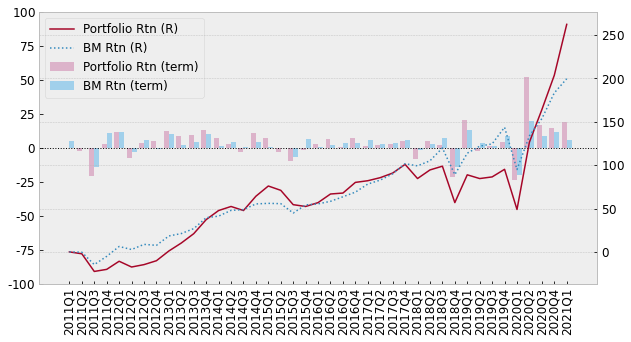

In [38]:
# 총자산 회전율
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1') # 2011년 1분기 ~ 2021년 1분기
# data = {}
# for t in terms:
#   data[t] = fs.fn_consolidated(otp=OTP, term=t)

s = {}
signal = {}

for t in terms:
  prev_t = fs.quarters_before(terms, t, 4)
  data[t]['Avg Assets'] = (data[t]['Total Assets'] + data[prev_t]['Total Assets']) / 2
  data[t]['Assets Turnover'] = data[t]['Revenue'] / data[t]['Avg Assets']
  
  s[t] = fs.fn_filter(data[t], by='Assets Turnover', floor=0, n=30, asc=False)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

* 총자산회전율만 가지고 전략을 꾸려도 성과가 상당함, MDD도 준수한 편
* 총자산회전율은 자산을 굴려서 돈을 만들어내는 속도 -> **ROA, GP/A, 총자산회전율**은 모두 비슷한 지표

### [GP/A 대신 GP/E를 적용하여 백테스팅(Asset 대신 Equity)]

CAGR: 12.89%
Accumulated return: 236.47%
Investment period: 10.0yrs
Sharpe ratio: 1.00
MDD: -32.04%


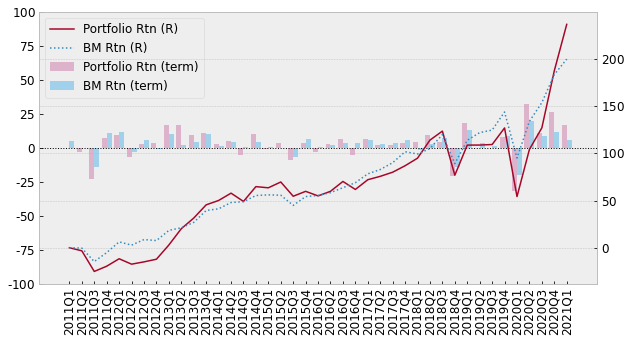

In [35]:
# GP/3
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1') # 2011년 1분기 ~ 2021년 1분기
# data = {}
# for t in terms:
#   data[t] = fs.fn_consolidated(otp=OTP, term=t)

s = {}
signal = {}

for t in terms:
  prev_t = fs.quarters_before(terms, t, 4)
  data[t]['Avg Equity'] = (data[t]['Shareholders Equity'] + data[prev_t]['Shareholders Equity']) / 2
  data[t]['GP/E'] = data[t]['Gross Profit'] / data[t]['Avg Equity']
  data[t].loc[(data[t]['Gross Profit'] < 0) | (data[t]['Avg Equity'] < 0) | (data[t]['Shareholders Equity'] < 0), 'GP/E'] = float('nan')
  
  s[t] = fs.fn_filter(data[t], by='GP/E', floor=0, n=30, asc=False)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

-> GP/E의 성과는 GP/A보다 별로 개선되지 못했음

* GP/A의 백테스팅 결과
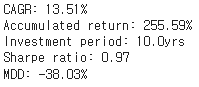

### [총자산회전율 대신 총자본회전율(이하 S/E)를 적용하여 백테스팅]

CAGR: 17.49%
Accumulated return: 401.78%
Investment period: 10.0yrs
Sharpe ratio: 1.49
MDD: -32.48%


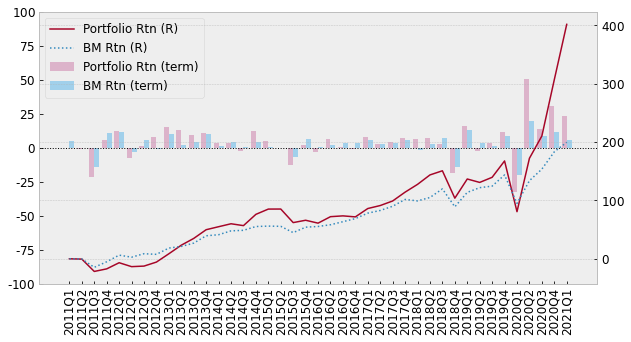

In [36]:
# S/E, Eqauity Turnover
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1') # 2011년 1분기 ~ 2021년 1분기
# data = {}
# for t in terms:
#   data[t] = fs.fn_consolidated(otp=OTP, term=t)

s = {}
signal = {}

for t in terms:
  prev_t = fs.quarters_before(terms, t, 4)
  data[t]['Avg Equity'] = (data[t]['Shareholders Equity'] + data[prev_t]['Shareholders Equity']) / 2
  data[t]['Equity Turnover'] = data[t]['Revenue'] / data[t]['Avg Equity']
  
  s[t] = fs.fn_filter(data[t], by='Equity Turnover', floor=0, n=30, asc=False)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

### [분기별로 매출채권 회전율이 높은 30개 종목을 선정해 투자하는 전략 테스트]

CAGR: 15.82%
Accumulated return: 334.69%
Investment period: 10.0yrs
Sharpe ratio: 1.31
MDD: -23.56%


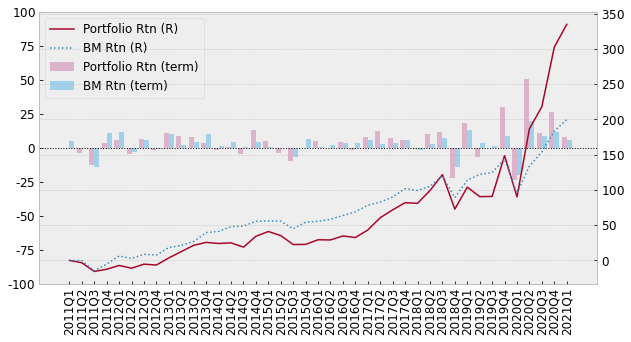

In [37]:
# Receivable Turnover
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1') # 2011년 1분기 ~ 2021년 1분기
# data = {}
# for t in terms:
#   data[t] = fs.fn_consolidated(otp=OTP, term=t)

s = {}
signal = {}

for t in terms:
  prev_t = fs.quarters_before(terms, t, 4)
  data[t]['Avg Receivables'] = (data[t]['Receivables'] + data[prev_t]['Receivables']) / 2
  data[t]['Receivables Turnover'] = data[t]['Revenue'] / data[t]['Avg Receivables']
  
  s[t] = fs.fn_filter(data[t], by='Receivables Turnover', floor=0, n=30, asc=False)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

### [분기별로 재고자산 회전율이 높은 30개 종목을 선정해 투자하는 전략 테스트]

CAGR: 16.43%
Accumulated return: 358.48%
Investment period: 10.0yrs
Sharpe ratio: 1.47
MDD: -30.86%


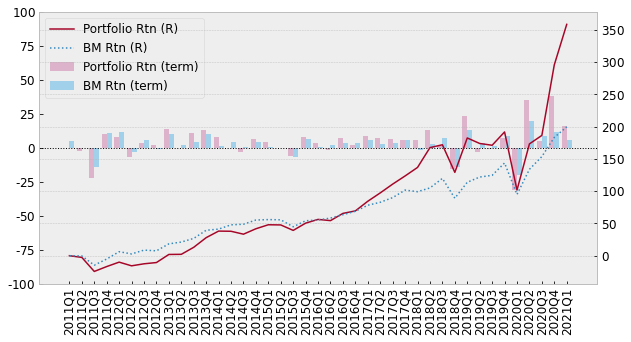

In [39]:
# Inventory Turnover
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1') # 2011년 1분기 ~ 2021년 1분기
# data = {}
# for t in terms:
#   data[t] = fs.fn_consolidated(otp=OTP, term=t)

s = {}
signal = {}

for t in terms:
  prev_t = fs.quarters_before(terms, t, 4)
  data[t]['Avg Inventory'] = (data[t]['Inventory'] + data[prev_t]['Inventory']) / 2
  data[t]['Inventory Turnover'] = data[t]['COGS'] / data[t]['Avg Inventory']
  
  s[t] = fs.fn_filter(data[t], by='Inventory Turnover', floor=0, n=30, asc=False)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

# 7) 이익률 지표

* **경제적 해자** : 기업을 지키는 강력한 경쟁 요소 -> 정량적으로 측정하기 힘들기 때문에 이익률로 대체해서 측정

1. **매출총이익률(Gross Margin)** = 매출총이익(Gross Profit)/매출액(Revenue)
2. **영업이익률(Operating Margin)** : 영업이익(Operating Income)/매출액(Revenue)
3. **순이익률(Net Profit Margin)** : 당기순이익(Net Income)/매출액(Revenue)

## 1) 지표산출

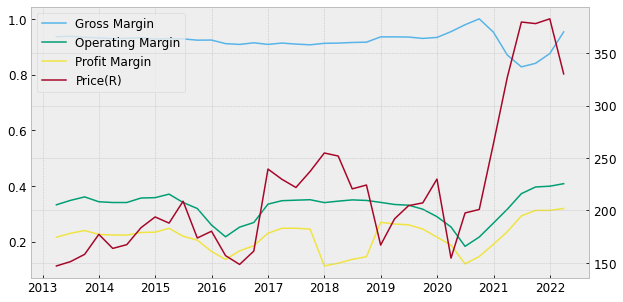

In [40]:
# 골드만삭스(GS)의 이익률 비교 (금융업)
df = fs.fn_single(otp=OTP, symbol='GS', window='T')
df['Gross Margin'] = df['Gross Profit'] / df['Revenue'] # 매출총이익률
df['Operating Margin'] = df['Operating Income'] / df['Revenue'] # 영업이익률
df['Profit Margin'] = df['Net Income'] / df['Revenue'] # 순이익률
fs.draw_chart(df, left=['Gross Margin', 'Operating Margin', 'Profit Margin'], right='Price') # 연동되지 않아보임

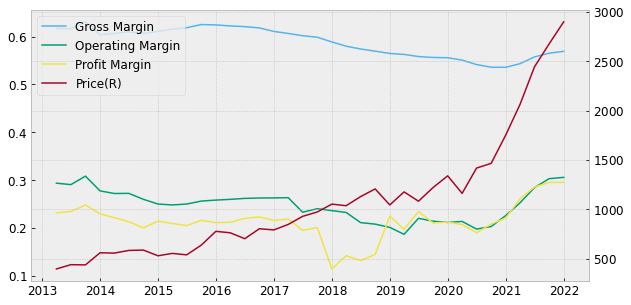

In [41]:
# 구글(GOOGL)의 이익률 비교 (IT회사)
df = fs.fn_single(otp=OTP, symbol='GOOGL', window='T')
df['Gross Margin'] = df['Gross Profit'] / df['Revenue'] # 매출총이익률
df['Operating Margin'] = df['Operating Income'] / df['Revenue'] # 영업이익률
df['Profit Margin'] = df['Net Income'] / df['Revenue'] # 순이익률
fs.draw_chart(df, left=['Gross Margin', 'Operating Margin', 'Profit Margin'], right='Price')

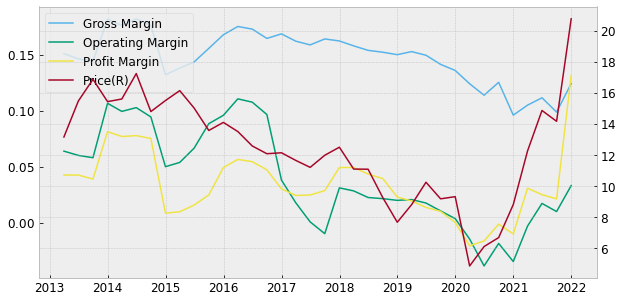

In [42]:
# 포드(F)의 이익률 비교 (제조업)
df = fs.fn_single(otp=OTP, symbol='F', window='T')
df['Gross Margin'] = df['Gross Profit'] / df['Revenue'] # 매출총이익률
df['Operating Margin'] = df['Operating Income'] / df['Revenue'] # 영업이익률
df['Profit Margin'] = df['Net Income'] / df['Revenue'] # 순이익률
fs.draw_chart(df, left=['Gross Margin', 'Operating Margin', 'Profit Margin'], right='Price')

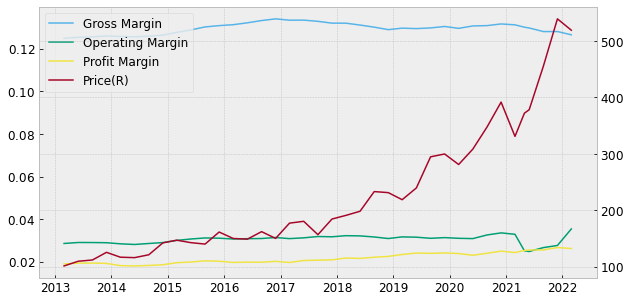

In [43]:
# 코스트코(COST)의 이익률 비교 (마트)
df = fs.fn_single(otp=OTP, symbol='COST', window='T')
df['Gross Margin'] = df['Gross Profit'] / df['Revenue'] # 매출총이익률
df['Operating Margin'] = df['Operating Income'] / df['Revenue'] # 영업이익률
df['Profit Margin'] = df['Net Income'] / df['Revenue'] # 순이익률
fs.draw_chart(df, left=['Gross Margin', 'Operating Margin', 'Profit Margin'], right='Price')

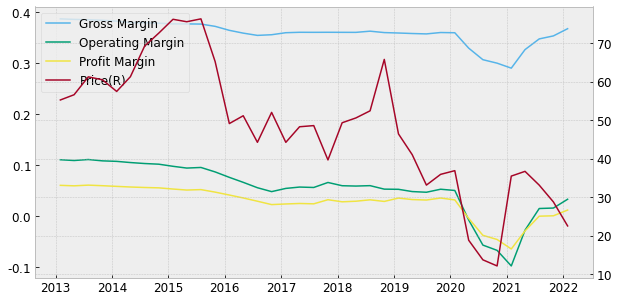

In [44]:
# 노드스트롬(JWN)의 이익률 비교 (마트)
df = fs.fn_single(otp=OTP, symbol='JWN', window='T')
df['Gross Margin'] = df['Gross Profit'] / df['Revenue'] # 매출총이익률
df['Operating Margin'] = df['Operating Income'] / df['Revenue'] # 영업이익률
df['Profit Margin'] = df['Net Income'] / df['Revenue'] # 순이익률
fs.draw_chart(df, left=['Gross Margin', 'Operating Margin', 'Profit Margin'], right='Price')

## 2) 백테스트

### [분기별로 이익률 상위 30개 종목을 골라서 투자하는 전략을 테스트]

CAGR: 15.67%
Accumulated return: 329.41%
Investment period: 10.0yrs
Sharpe ratio: 1.14
MDD: -25.37%


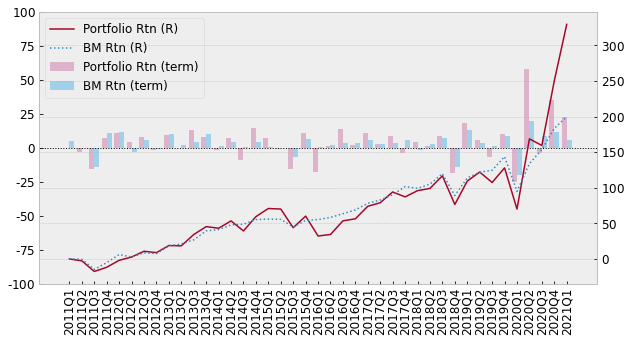

In [45]:
# Gross Margin
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1') # 2011년 1분기 ~ 2021년 1분기
# data = {}
# for t in terms:
#   data[t] = fs.fn_consolidated(otp=OTP, term=t)

s = {}
signal = {}

for t in terms:
  data[t]['Gross Margin'] = data[t]['Gross Profit'] / data[t]['Revenue']
  
  s[t] = fs.fn_filter(data[t], by='Gross Margin', floor=0, n=30, asc=False)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

-> 성과는 좋지만 업종을 구분할 필요가 있음

### [특종 업종만을 대상으로 같은 백테스트]
: **sector_info() 함수**를 이용하면 데이터에 들어있는 종목의 *섹터와 산업을 분류*할 수 있음

In [46]:
sector_info = fs.sector_info(data['2020Q3']) # 예시를 위해 2020년 3분기의 산업군 리스트 확인
sector_info # 11개의 산업군과 other를 포함한 총 12개의 산업군을 볼 수 있음

sector
Basic Materials           [Aluminum, Gold, Silver, Specialty Chemicals, ...
Communication Services    [Entertainment, Broadcasting, Telecom Services...
Consumer Cyclical         [Specialty Retail, Auto & Truck Dealerships, G...
Consumer Defensive        [Beverages Brewers, Farm Products, Education &...
Energy                    [Oil & Gas Midstream, Oil & Gas E&P, Oil & Gas...
Financial Services        [Banks Regional, Insurance Diversified, Credit...
Healthcare                [Diagnostics & Research, Biotechnology, Drug M...
Industrials               [Airlines, Building Products & Equipment, Airp...
Other                                                               [Other]
Real Estate               [Reit Mortgage, Reit Diversified, Reit Residen...
Technology                [Semiconductors, Consumer Electronics, Softwar...
Utilities                 [Utilities Regulated Electric, Utilities Diver...
Name: industry, dtype: object

In [48]:
fs.sector_filter(df=data['2020Q4'], sector=['Technology']) # 2020년 4분기의 "Technology" 산업군을 선택

,term,Revenue,COGS,Gross Profit,SG&A,Operating Income,Net Income,EPS,EBITDA,EBIT,...,Avg Assets,Assets Turnover,Avg Equity,GP/E,Equity Turnover,Avg Receivables,Receivables Turnover,Avg Inventory,Inventory Turnover,Gross Margin
symbol,,,,,,,,,,,,,,,,,,,,,
AAOI,2020Q4,234.62,184.18,50.44,55.89,-48.84,-58.45,-2.71,-23.44,-48.84,...,473.81,0.50,275.84,0.18,0.85,39.05,6.01,97.71,1.88,0.21
AAPL,2020Q4,"294,239.00","179,823.00","114,416.00","20,350.00","74,253.00","63,930.00",3.72,"85,508.00","74,253.00",...,"347,336.00",0.85,"77,877.50",1.47,3.78,"49,283.00",5.97,"4,535.00",39.65,0.39
ACIW,2020Q4,"1,294.32",655.32,639.00,256.04,144.74,72.66,0.61,312.12,144.74,...,"3,322.27",0.39,"1,168.49",0.55,1.11,653.60,1.98,NaN,NaN,0.49
ACLS,2020Q4,474.56,275.98,198.58,78.71,58.04,49.98,1.49,67.98,58.04,...,589.33,0.81,450.51,0.44,1.05,85.31,5.56,150.72,1.83,0.42
ACMR,2020Q4,156.62,87.03,69.60,28.99,21.49,18.78,0.95,22.55,21.49,...,279.48,0.56,152.75,0.46,1.03,49.91,3.14,66.72,1.30,0.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPP,2020Q4,985.96,781.72,204.24,95.09,26.70,35.06,0.54,26.70,26.70,...,824.05,1.20,388.59,0.53,2.54,204.39,4.82,157.49,4.96,0.21
ZI,2020Q4,476.20,95.50,380.70,245.90,37.10,-9.90,-0.07,113.20,37.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.80
ZM,2020Q4,"1,957.13",587.25,"1,369.88",823.22,414.28,425.04,1.52,520.99,414.28,...,"2,119.18",0.92,"1,136.22",1.21,1.72,188.33,10.39,NaN,NaN,0.70


* 이렇게 **선택된 산업군만 적용**하여 백테스팅 적용
* 매출총이익률 상위 30개 종목 백테스팅을 실행

CAGR: 15.67%
Accumulated return: 329.41%
Investment period: 10.0yrs
Sharpe ratio: 1.14
MDD: -25.37%


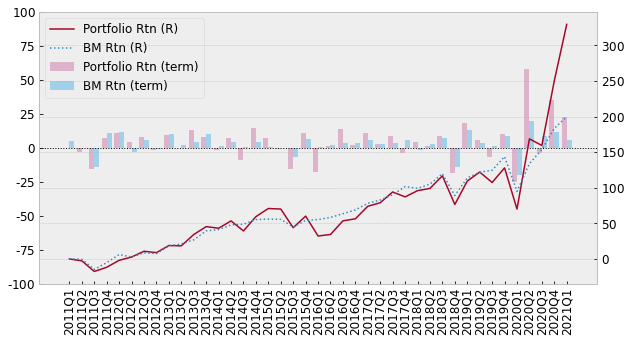

In [49]:
# Gross Margin
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1') # 2011년 1분기 ~ 2021년 1분기
# data = {}
# for t in terms:
#   data[t] = fs.fn_consolidated(otp=OTP, term=t)

s = {}
signal = {}

for t in terms:
  data[t]['Gross Margin'] = data[t]['Gross Profit'] / data[t]['Revenue'] * 100
  
  s[t] = fs.sector_filter(df=data[t], sector=['Technology']) # 분기별 "Technology" 산업군 추출
  s[t] = fs.fn_filter(data[t], by='Gross Margin', floor=0, n=30, asc=False)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df) # IT 섹터 종목으로만 했더니 수익률이 훨씬 좋아짐

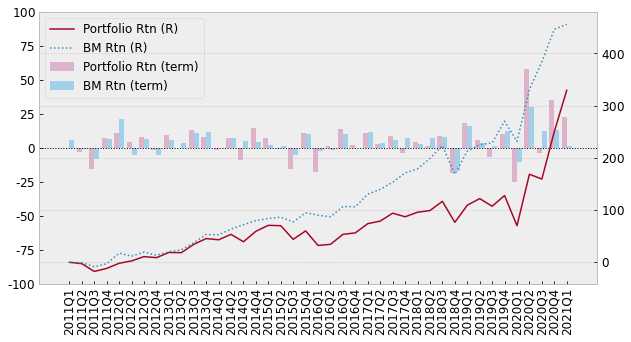

In [50]:
# "Technology" 산업군 백테스팅 비교를 위해 관련 ETF인 QQQ를 벤치마크로 지정
fs.draw_return(df, bm='QQQ') # 대부분이 기술주인 ETF

-> 매출총이익률 전략의 수익률이 벤치마크 수익률보다 못한 것을 확인할 수 있음

CAGR: -1.06%
Accumulated return: -10.07%
Investment period: 10.0yrs
Sharpe ratio: -0.05
MDD: -51.52%


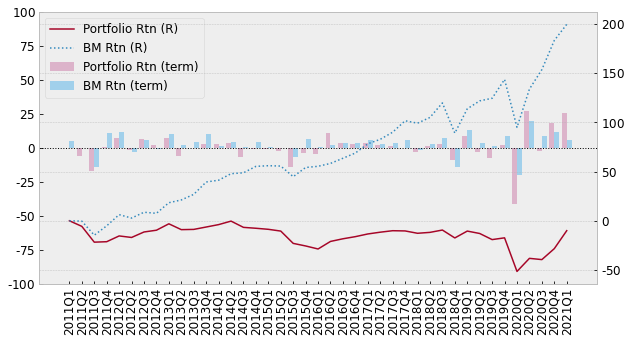

In [51]:
# Operating Margin
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1') # 2011년 1분기 ~ 2021년 1분기
# data = {}
# for t in terms:
#   data[t] = fs.fn_consolidated(otp=OTP, term=t)

s = {}
signal = {}

for t in terms:
  data[t]['Operating Margin'] = data[t]['Operating Income'] / data[t]['Revenue'] * 100
  
  s[t] = fs.sector_filter(df=data[t], sector=['Technology']) # 분기별 "Technology" 산업군 추출
  s[t] = fs.fn_filter(data[t], by='Operating Margin', floor=0, n=30, asc=False)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

# 8. 지분가치가 훼손되는 주식

1. **주식분할** : 기존에 발행한 주식의 수를 **일정 배율만큼** 늘리는 것
  - 투자자에게 직접적인 영향이 없음
  - 주식 수가 **배수적**으로 늘어남 -> 주식수 *증가폭이 큼*
2. **유상증자** : 기존에 발행한 주식의 수에서 **추가로 주식을 발행**하는 것
  - 투자자에게 직접적인 영향을 끼침
  - 주식 수가 **점진적**으로 늘어남 -> 주식수 *증가폭이 작음*


In [53]:
df = fs.fn_single(otp=OTP, symbol='TSLA', window='T') # 2020년에 유상증자를 실행한 테슬라(TSLA)의 재무제표 불러오기

In [54]:
df.columns # 재무 데이터 항목 중 주식수 관련 항목 찾기

Index(['Revenue', 'COGS', 'Gross Profit', 'SG&A', 'Operating Income',
       'Net Income', 'EPS', 'EBITDA', 'EBIT', 'Shares', 'Cash & Equivalents',
       'Receivables', 'Inventory', 'Current Assets', 'Long Term Assets',
       'Total Assets', 'Current Debt', 'Current Liabilities', 'Long Term Debt',
       'Long Term Liabilities', 'Total Liabilities', 'Shareholders Equity',
       'Depreciation', 'Operating Cash Flow', 'Capital Expenditure',
       'Investing cash flow', 'Dividends', 'Financing cash flow', 'Price'],
      dtype='object')

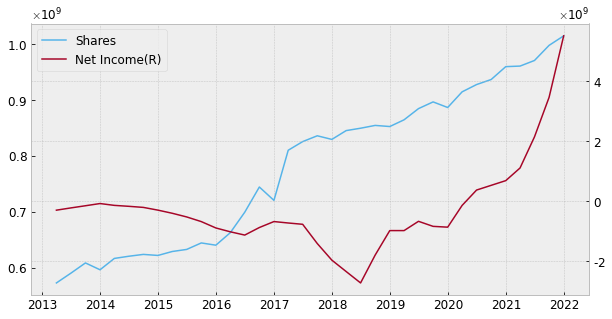

In [55]:
fs.draw_chart(df, left='Shares', right='Net Income') # 테슬라 주식수 변동 확인

-> 증자가 지속적으로 있어왔던 것이 차트로 확인됨, 그나마 순이익이 증가해서 다행이지만, 주주의 지분은 꾸준히 쪼그라들고 있음

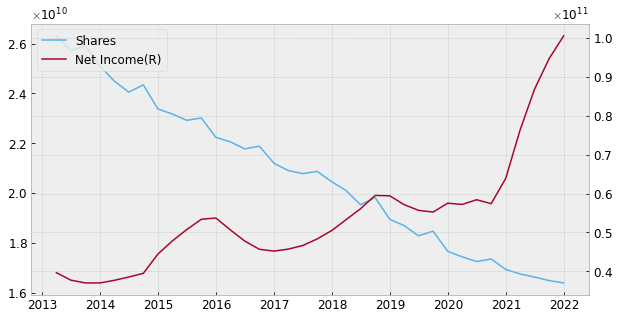

In [56]:
# 애플(AAPL)의 주식 수 변동 확인
df = fs.fn_single(otp=OTP, symbol='AAPL', window='T')
fs.draw_chart(df, left='Shares', right='Net Income')

-> 이상적인 그래프. 순이익은 지속적으로 증가하고, 주식수는 지속적으로 줄어듦 (주당순이익도 늘어나면서 동시에 지분가치가 계속 증가하고 있음)

* 주식 수가 줄어드는 좋은 예) 기업이 주주가치 극대화를 위해 이익잉여금으로 주식을 사들여 자사주 소각을 하는 경우 (ex. AAPL)
* 유상증자가 항상 좋은 예) 새로운 사업을 시작하기 위해 자본을 모집하는 경우
